In [1]:
import arcpy,pandas
import matplotlib.pyplot as plt
import numpy
import scipy.stats as st

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
dt = arcpy.da.FeatureClassToNumPyArray("./data/weather.shp",
                                       ["mean"])

### 目标累计分布函数图

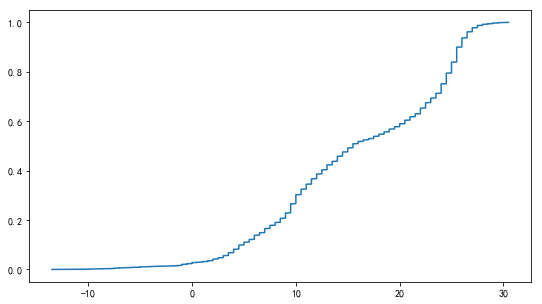

In [4]:
plt.figure(figsize=(9,5))
sortMean = numpy.sort(dt["mean"])
#yvals是每一个样本的分位数
yvals = numpy.arange(len(sortMean))/float(len(sortMean))
plt.plot(sortMean, yvals)

### QQ散点图

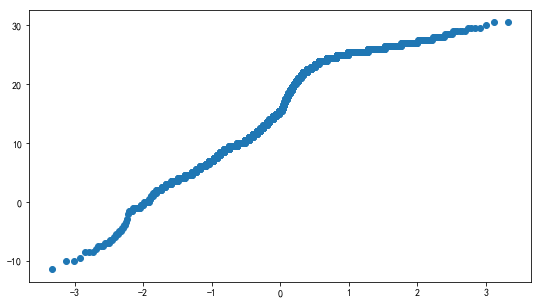

In [5]:
plt.figure(figsize=(9,5))
#对目标累计分布函数值求标准正太分布累计分布函数的逆
x_label = st.norm.ppf(yvals)
plt.scatter(x_label, sortMean)

### 正态QQ图

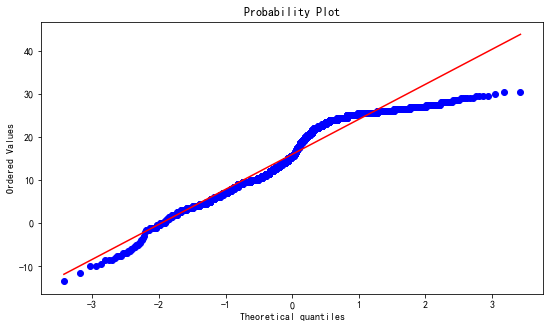

In [6]:
plt.figure(figsize=(9,5))
st.probplot(dt["mean"], dist="norm", plot=plt)
plt.show()